# Explore here

In [180]:
# Import
# Basics
import pandas as pd
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Separacion de datos
from sklearn.model_selection import train_test_split

# Codificacion
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Escalamiento
from sklearn.preprocessing import StandardScaler

# Seleccion de parametros
from sklearn.feature_selection import SelectKBest, f_classif

# Modelos
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

# Guardado del modelo
from pickle import dump


In [157]:
data = pd.read_csv("../data/raw/student_depression_dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [158]:
# Dimensiones del dataframe
data.shape

(27901, 18)

In [159]:
# Obtener información sobre tipos de datos y valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [160]:
# Analisis de duplicados
data.duplicated().sum()

np.int64(0)

In [161]:
# Seleccion inicial de atributos relevantes
# "id" : Eliminar, dato que asigna un numero a cada persona
display(data["Profession"].value_counts())
# "Profession" : Eliminar, 99 % de los datos de esa columna son "Student", no es valioso para el modelo
display(data["Work Pressure"].value_counts())
# "Work Pressure" : Eliminar, 99 % de los datos de esa columna son "0.0", no es valioso para el modelo
display(data["Job Satisfaction"].value_counts())
# "Job Satisfaction" : Eliminar, 99 % de los datos de esa columna son "0.0", no es valioso para el modelo

data = data.drop(["id", "Profession", "Work Pressure", "Job Satisfaction"], axis=1)
data

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


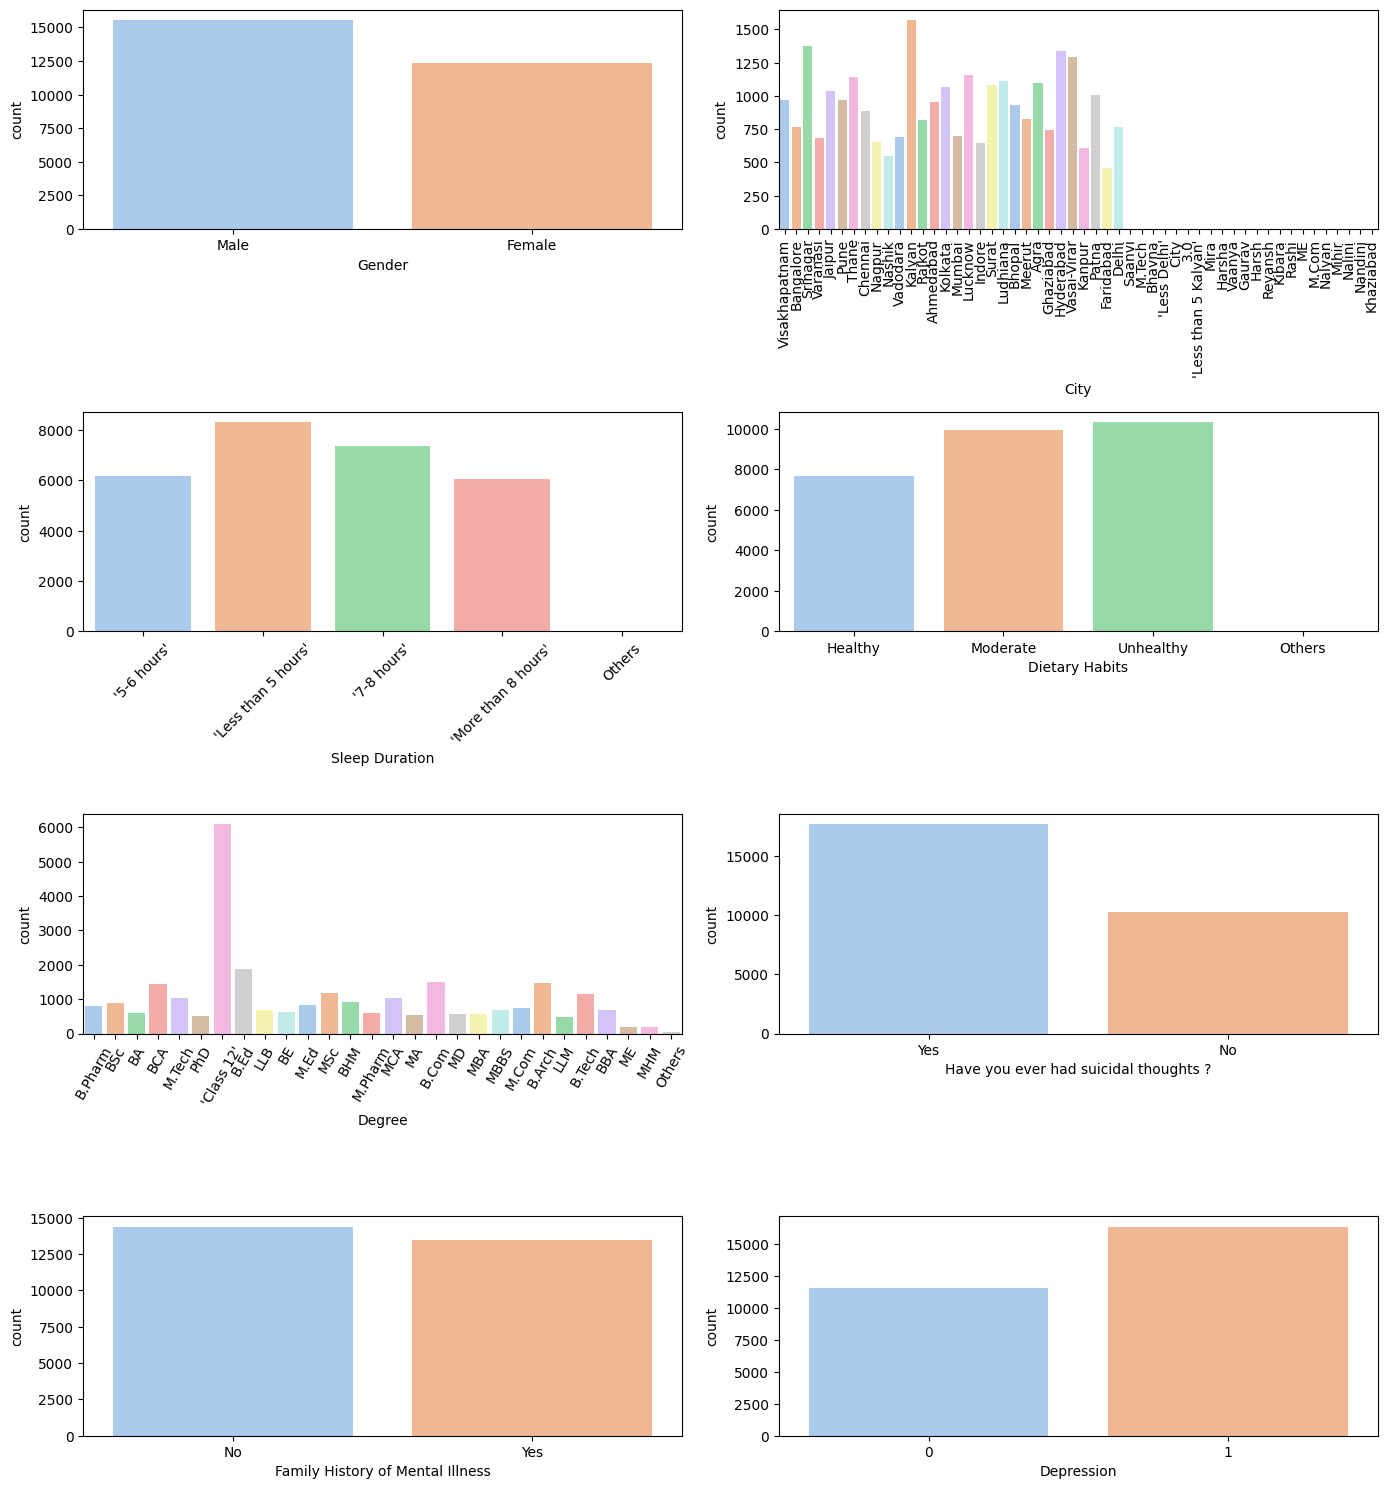

In [162]:
# ANALISIS DE VARIABLES CATEGORICAS
# ["Gender", "City", "Sleep Duration", "Dietary Habits", "Degree", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness", "Depression"]

fig, axis = plt.subplots(4, 2, figsize = (14, 15))

sns.countplot(ax = axis[0, 0], data = data, x = "Gender", palette='pastel', hue= "Gender", legend=False)
# axis[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax = axis[0, 1], data = data, x = "City", palette='pastel', hue= "City", legend=False)
axis[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(ax = axis[1, 0], data = data, x = "Sleep Duration", palette='pastel', hue= "Sleep Duration", legend=False)
axis[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax = axis[1, 1], data = data, x = "Dietary Habits", palette='pastel', hue= "Dietary Habits", legend=False)

sns.countplot(ax = axis[2, 0], data = data, x = "Degree", palette='pastel', hue= "Degree", legend=False)
axis[2, 0].tick_params(axis='x', rotation=60)

sns.countplot(ax = axis[2, 1], data = data, x = "Have you ever had suicidal thoughts ?", palette='pastel', hue= "Have you ever had suicidal thoughts ?", legend=False)

sns.countplot(ax = axis[3, 0], data = data, x = "Family History of Mental Illness", palette='pastel', hue= "Family History of Mental Illness", legend=False)

sns.countplot(ax = axis[3, 1], data = data, x = "Depression", palette='pastel', hue= "Depression", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

/tmp/ipykernel_831/1389533253.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Financial Stress'] = pd.to_numeric(data['Financial Stress'], errors='coerce')


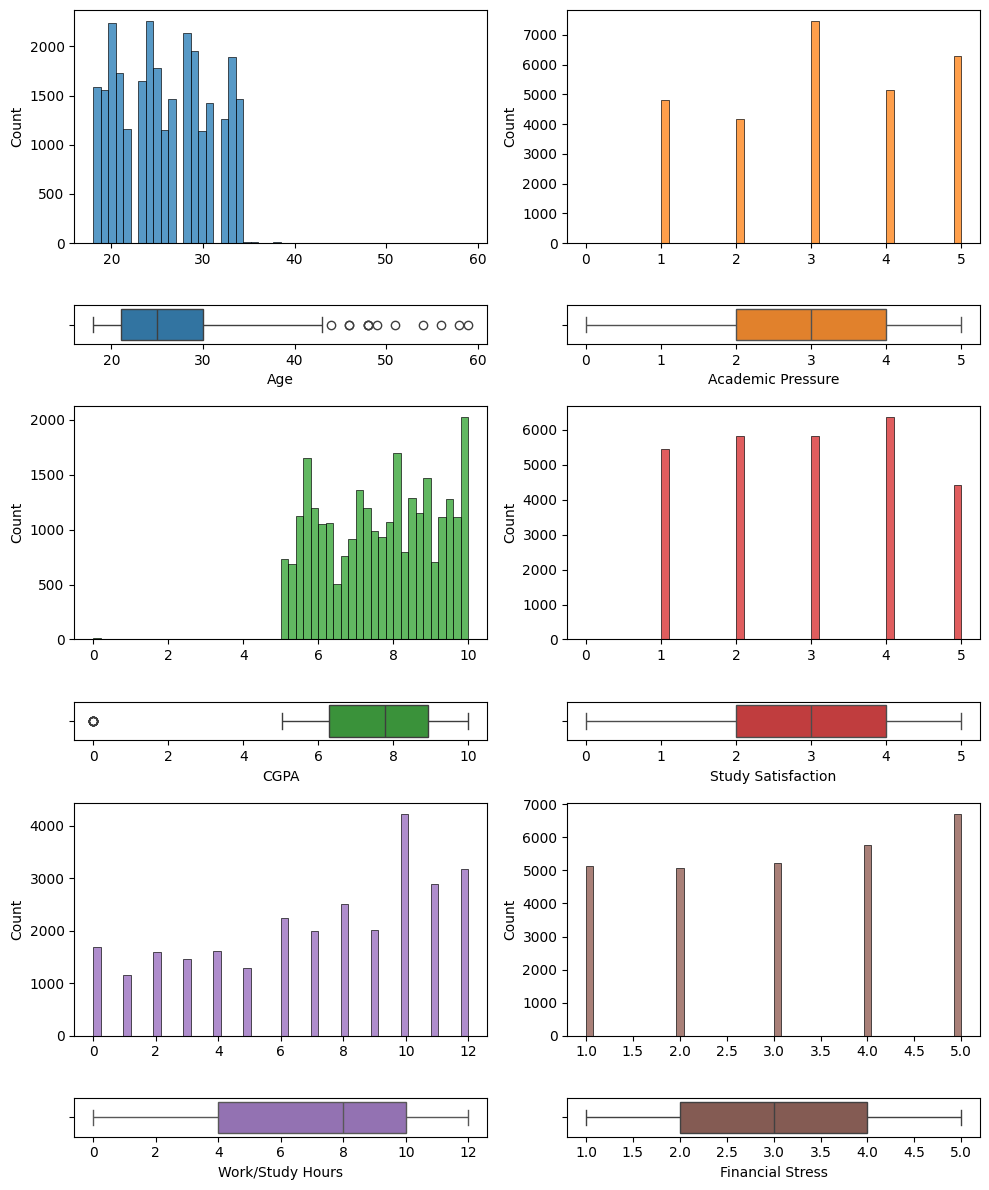

In [163]:
# ANALISIS DE VARIABLES NUMERICAS
# ["Age", "Academic Pressure", "CGPA", "Study Satisfaction", "Work/Study Hours", "Financial Stress"]
# Elimino los datos donde "Financial Stress" = ?, solo eran 3 datos  
data = data[data["Financial Stress"] != "?"]

data['Financial Stress'] = pd.to_numeric(data['Financial Stress'], errors='coerce')

fig, axis = plt.subplots(6, 2, figsize = (10, 12), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# Age
sns.histplot(ax = axis[0, 0], data = data, x = "Age", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "Age", color="#1f77b4").set(xlabel = "Age")

# Academic Pressure
sns.histplot(ax = axis[0, 1], data = data, x = "Academic Pressure", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "Academic Pressure", color="#ff7f0e").set(xlabel = "Academic Pressure")

# CGPA
sns.histplot(ax = axis[2, 0], data = data, x = "CGPA", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "CGPA", color="#2ca02c").set(xlabel = "CGPA")

# Study Satisfaction
sns.histplot(ax = axis[2, 1], data = data, x = "Study Satisfaction", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "Study Satisfaction", color="#d62728").set(xlabel = "Study Satisfaction")

# Work/Study Hours
sns.histplot(ax = axis[4, 0], data = data, x = "Work/Study Hours", bins=50, color="#9467bd").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "Work/Study Hours", color="#9467bd").set(xlabel = "Work/Study Hours")

# Financial Stress
sns.histplot(ax = axis[4, 1], data = data, x = "Financial Stress", bins=50, color="#8c564b").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "Financial Stress", color="#8c564b").set(xlabel = "Financial Stress")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

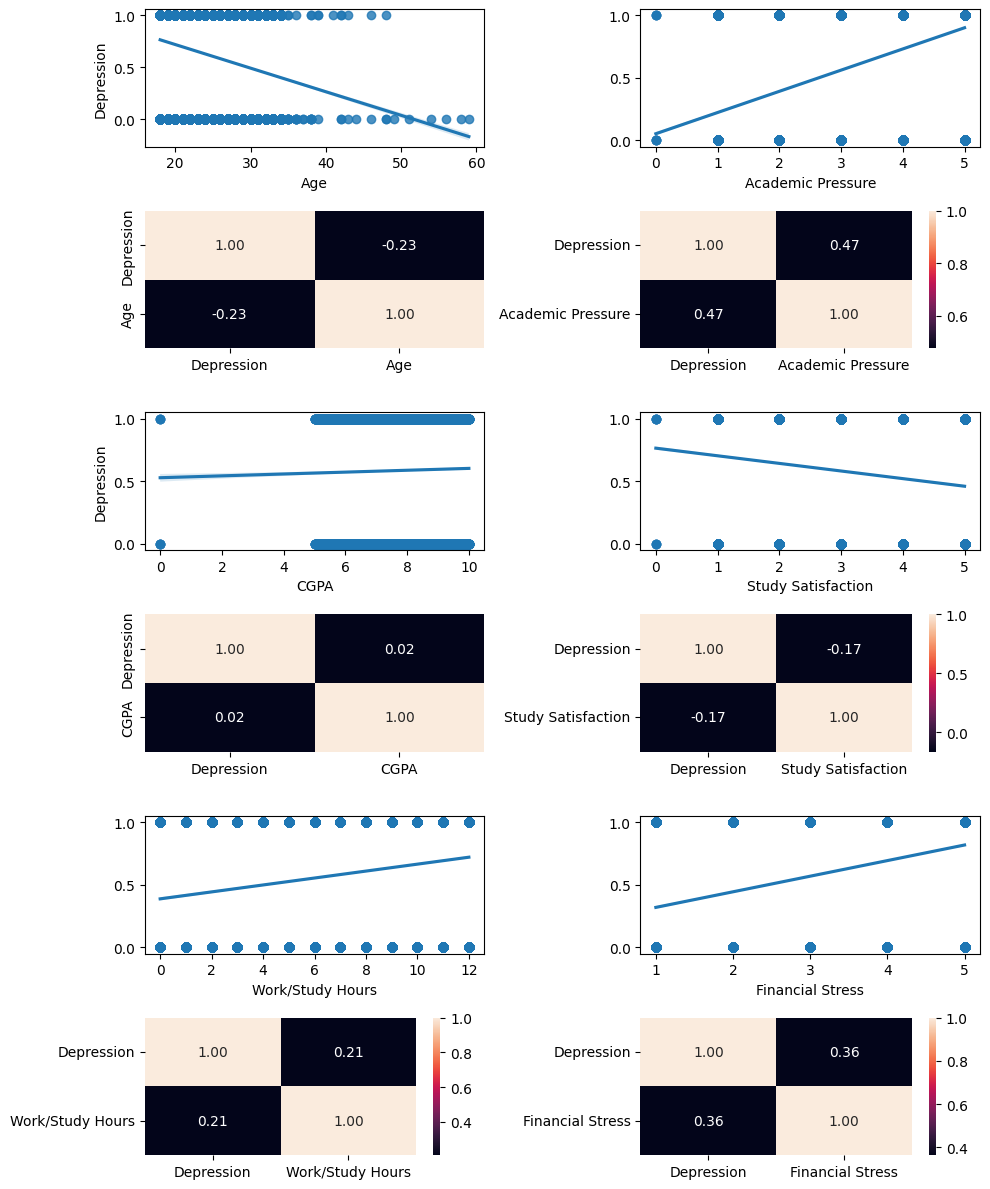

In [164]:
# ANÁLISIS NUMÉRICO - NUMÉRICO BUSCANDO CORRELACIONES ENTRE VARIABLES BUSCANDO RELACIÓN CON MI VARIABLE OBJETIVO "Depression"
# ["Age", "Academic Pressure", "CGPA", "Study Satisfaction", "Work/Study Hours", "Financial Stress"]

fig, axis = plt.subplots(6, 2, figsize = (10, 12))
# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "Age", y = "Depression")
sns.heatmap(data[["Depression", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "Academic Pressure", y = "Depression").set(ylabel=None)
sns.heatmap(data[["Depression", "Academic Pressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "CGPA", y = "Depression")
sns.heatmap(data[["Depression", "CGPA"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = data, x = "Study Satisfaction", y = "Depression").set(ylabel=None)
sns.heatmap(data[["Depression", "Study Satisfaction"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = data, x = "Work/Study Hours", y = "Depression").set(ylabel=None)
sns.heatmap(data[["Depression", "Work/Study Hours"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0])

sns.regplot(ax = axis[4, 1], data = data, x = "Financial Stress", y = "Depression").set(ylabel=None)
sns.heatmap(data[["Depression", "Financial Stress"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

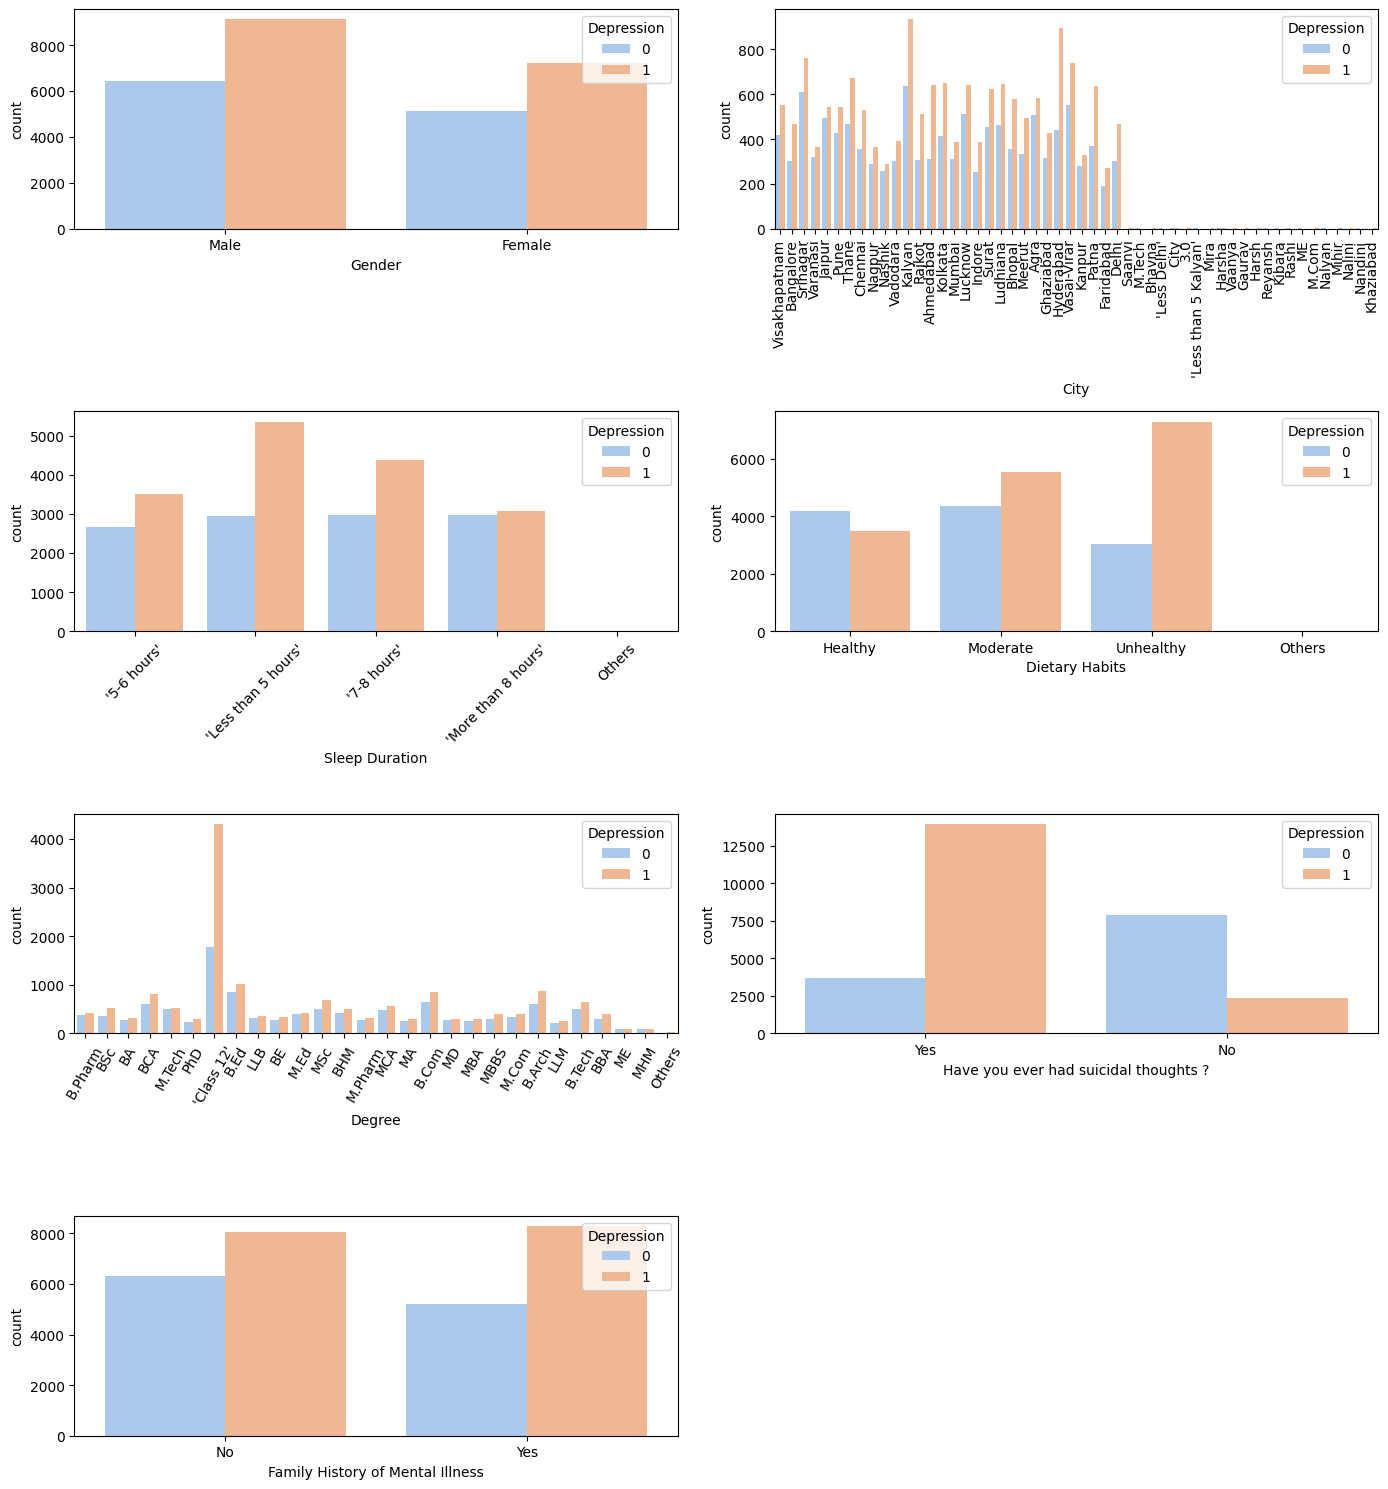

In [165]:
# ANÁLISIS CATEGÓRICO - CATEGÓRICO
# ["Gender", "City", "Sleep Duration", "Dietary Habits", "Degree", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness", "Depression"]

fig, axis = plt.subplots(4, 2, figsize = (14, 15))

sns.countplot(ax = axis[0, 0], data = data, x = "Gender", palette='pastel', hue= "Depression", legend=True)

sns.countplot(ax = axis[0, 1], data = data, x = "City", palette='pastel', hue= "Depression", legend=True)
axis[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(ax = axis[1, 0], data = data, x = "Sleep Duration", palette='pastel', hue= "Depression", legend=True)
axis[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax = axis[1, 1], data = data, x = "Dietary Habits", palette='pastel', hue= "Depression", legend=True)

sns.countplot(ax = axis[2, 0], data = data, x = "Degree", palette='pastel', hue= "Depression", legend=True)
axis[2, 0].tick_params(axis='x', rotation=60)

sns.countplot(ax = axis[2, 1], data = data, x = "Have you ever had suicidal thoughts ?", palette='pastel', hue= "Depression", legend=True)

sns.countplot(ax = axis[3, 0], data = data, x = "Family History of Mental Illness", palette='pastel', hue= "Depression", legend=True)

axis[3, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

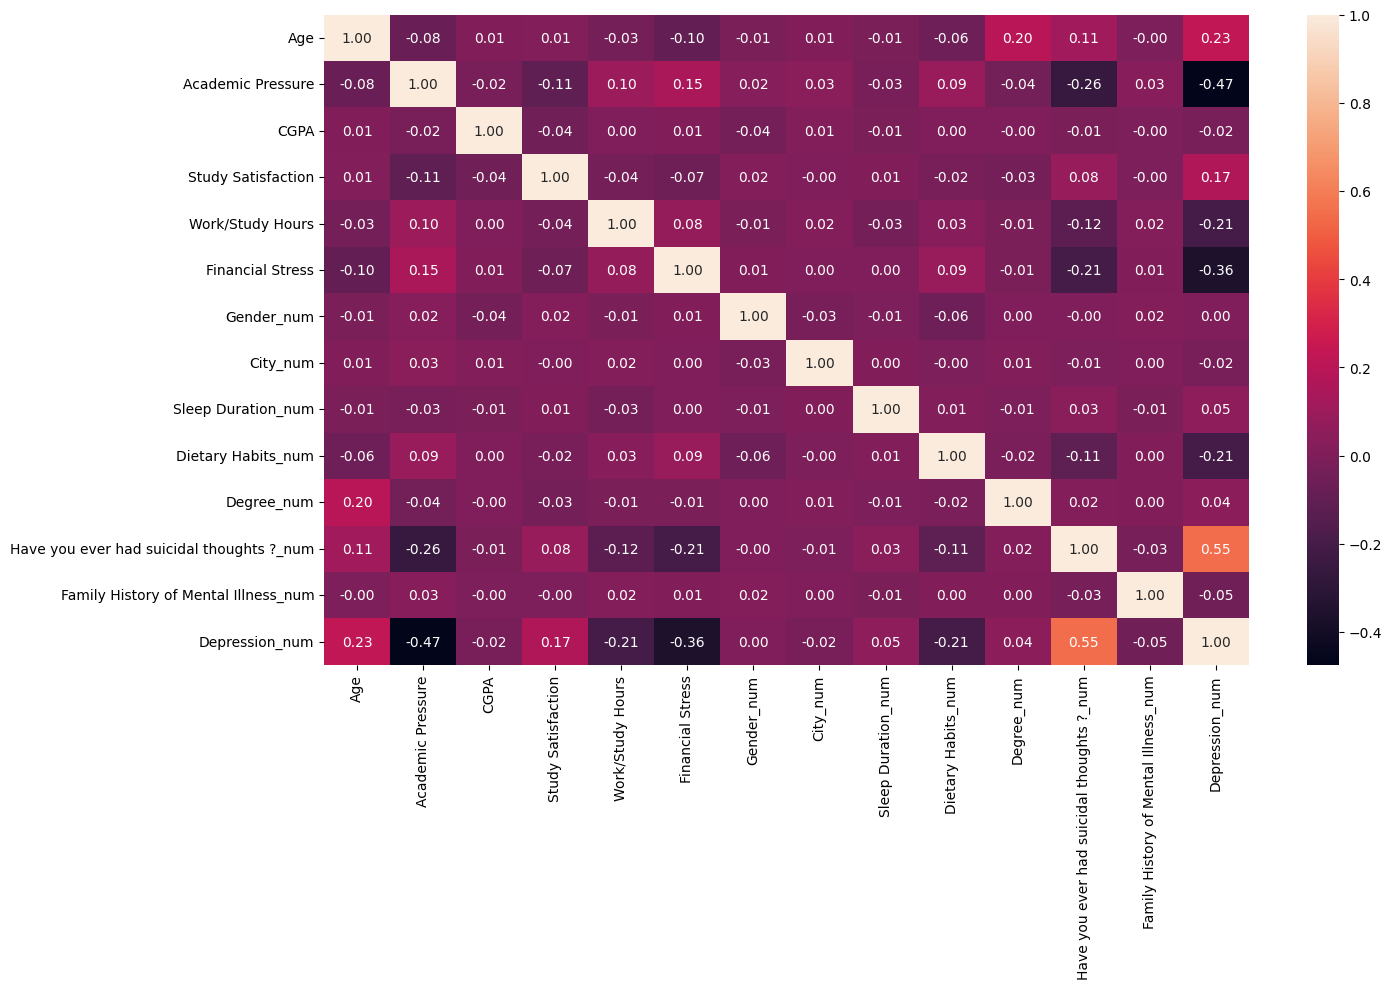

In [166]:
# ANÁLISIS NUMÉRICO - CATEGÓRICO COMPLETO
# Dataset solo para este analisis
data_temp = data.copy()
cat_vars = ["Gender", "City", "Sleep Duration", "Dietary Habits", "Degree", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness", "Depression"]
for var in cat_vars:
    data_temp[f"{var}_num"] = pd.factorize(data_temp[var])[0]
    data_temp = data_temp.drop(var, axis=1)

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap(data_temp.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

del data_temp

In [167]:
# LIMPIEZA DE VALORES ATÍPICOS
# Age
# display(data.Age.describe())
max_age = data["Age"].quantile(0.99)
data_filtered = data[data["Age"] <= max_age]  # Elimina el 1% más alto
# display(data_filtered.Age.describe())

In [168]:
# CGPA
# Elimino promedio de calificaciones acumulativo igual a 0
data_filtered = data_filtered[data_filtered["CGPA"] != 0]

In [169]:
# Sleep Duration
# Elimino valores "Others" (14 datos)
data_filtered = data_filtered[data_filtered["Sleep Duration"] != "Others"]
data_filtered = data_filtered[data_filtered["Dietary Habits"] != "Others"]

In [170]:
# TRATAMIENTO DE VALORES FALTANTES
data_filtered.isnull().sum().sort_values(ascending=False)
# El dataset en este punto no presenta valores faltantes, como ya habíamos visto al inicio del análisis

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [171]:
# CODIFICACIÓN Y ESCALAMIENTO

# ["City", "Degree"] se pefiere eliminarlas de la primera prueba del modelo ya que no presentan correlacion con practicamente ninguna otra variable
# De mantenerlas se les aplicaria OneHotEncoding, lo cual llevaría a mas de 70 nuevas columnas, por lo que habria que agruparlas etc.
# Se prefiere por ahora eliminarlas y ver si las metricas no se ven afectadas
data_filtered = data_filtered.drop(["City", "Degree"], axis=1)

# Separación de train y test
X = data_filtered.drop("Depression", axis = 1)
y = data_filtered['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Guardar mi informacion en dos archivos .csv para el trabajo desde app.py
# Unir X_train con y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Unir X_test con y_test
test_data = pd.concat([X_test, y_test], axis=1)

# Guardar en archivos CSV
train_data.to_csv('../data/processed/train_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)

In [172]:
# Codificacion de variables categoricas
# ["Gender", "City", "Sleep Duration", "Dietary Habits", "Degree", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]

# Con LabelEncoder() >>> ["Gender", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]

# Instancio el encoder
label_encoder_gender = LabelEncoder()
label_encoder_suicidal = LabelEncoder()
label_encoder_mental = LabelEncoder()

# Entreno el encoder con los datos de entrenamiento
label_encoder_gender.fit(X_train['Gender'])
label_encoder_suicidal.fit(X_train['Have you ever had suicidal thoughts ?'])
label_encoder_mental.fit(X_train['Family History of Mental Illness'])

# Aplico el encoder en ambos
X_train['Gender_le'] = label_encoder_gender.transform(X_train['Gender'])
X_train['Have you ever had suicidal thoughts ?_le'] = label_encoder_suicidal.transform(X_train['Have you ever had suicidal thoughts ?'])
X_train['Family History of Mental Illness_le'] = label_encoder_mental.transform(X_train['Family History of Mental Illness'])

X_test['Gender_le'] = label_encoder_gender.transform(X_test['Gender'])
X_test['Have you ever had suicidal thoughts ?_le'] = label_encoder_suicidal.transform(X_test['Have you ever had suicidal thoughts ?'])
X_test['Family History of Mental Illness_le'] = label_encoder_mental.transform(X_test['Family History of Mental Illness'])

X_train = X_train.drop(["Gender", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"], axis=1)
X_test = X_test.drop(["Gender", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"], axis=1)

In [173]:
# Con OrdinalEncoder() >>> ["Sleep Duration", "Dietary Habits"]

# Instancio el encoder
ordinal_encoder_sleep = OrdinalEncoder(categories=[["'Less than 5 hours'", "'5-6 hours'", "'7-8 hours'", "'More than 8 hours'"]])
ordinal_encoder_dietary = OrdinalEncoder(categories=[["Unhealthy", "Moderate", "Healthy"]])

# Entreno el encoder con los datos de entrenamiento
ordinal_encoder_sleep.fit(X_train[['Sleep Duration']])
ordinal_encoder_dietary.fit(X_train[['Dietary Habits']])

# aplico el encoder en amhos
X_train['Sleep Duration_oe'] = ordinal_encoder_sleep.transform(X_train[['Sleep Duration']])
X_train['Dietary Habits_oe'] = ordinal_encoder_dietary.transform(X_train[['Dietary Habits']])

X_test['Sleep Duration_oe'] = ordinal_encoder_sleep.transform(X_test[['Sleep Duration']])
X_test['Dietary Habits_oe'] = ordinal_encoder_dietary.transform(X_test[['Dietary Habits']])

X_train = X_train.drop(["Sleep Duration", "Dietary Habits"], axis=1)
X_test = X_test.drop(["Sleep Duration", "Dietary Habits"], axis=1)

In [177]:
# ESCALAMIENTO

# Instancio el escalador
scaler = StandardScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Aplico el escalador en ambos
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Gender_le,Have you ever had suicidal thoughts ?_le,Family History of Mental Illness_le,Sleep Duration_oe,Dietary Habits_oe
2106,0.657106,-1.556096,1.128254,0.77135,-1.926883,1.294829,-1.124365,-1.319181,1.036256,0.534954,0.116894
23173,0.451692,-1.556096,-1.501673,0.03653,0.230076,-1.491991,0.889391,0.758046,1.036256,0.534954,0.116894
11405,-1.397030,-0.830933,-1.023504,-0.69829,-1.118023,-0.795286,-1.124365,0.758046,-0.965013,-0.353428,1.371434
3218,0.451692,-1.556096,-0.347237,1.50617,1.038936,0.598124,-1.124365,0.758046,-0.965013,1.423336,0.116894
15023,-0.986203,1.344557,-0.873223,-0.69829,-1.657263,1.294829,0.889391,0.758046,-0.965013,-0.353428,-1.137646


In [179]:
# Selección de parámetros
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()

,Age,Academic Pressure,Work/Study Hours,Financial Stress,Have you ever had suicidal thoughts ?_le
0,0.657106,-1.556096,-1.926883,1.294829,-1.319181
1,0.451692,-1.556096,0.230076,-1.491991,0.758046
2,-1.397030,-0.830933,-1.118023,-0.795286,0.758046
3,0.451692,-1.556096,1.038936,0.598124,0.758046
4,-0.986203,1.344557,-1.657263,1.294829,0.758046


In [181]:
# Modelo
model = DecisionTreeClassifier(random_state = 42)

# Entrenamiento
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(random_state=42)

In [183]:
# Predicción
y_pred_test = model.predict(X_test_sel)
y_pred_train = model.predict(X_train_sel)

In [184]:
# Metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print()
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7898615854754629
F1 score Test:  0.7898615854754629
Precision Test:  0.7898615854754629
Recall Test:  0.7898615854754629

Accuracy Train:  0.9002606975907946
F1 score Train:  0.9002606975907946
Precision Train:  0.9002606975907946
Recall Train:  0.9002606975907946


In [186]:
# Grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
    'criterion': ['gini', 'entropy']
}

In [187]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # validación cruzada de 5 folds
    scoring='accuracy'  # Métrica a optimizar
)

In [188]:
grid_search.fit(X_train_sel, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [189]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 20}


In [190]:
# Modelo
model = DecisionTreeClassifier(criterion="entropy", max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=20, random_state = 42)

# Entrenamiento
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=20, random_state=42)

In [191]:
# Predicción
y_pred_test = model.predict(X_test_sel)

In [192]:
y_pred_train = model.predict(X_train_sel)

In [193]:
# Metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print()
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.8365989573970879
F1 score Test:  0.8365989573970879
Precision Test:  0.8365989573970879
Recall Test:  0.8365989573970879

Accuracy Train:  0.8404350952894643
F1 score Train:  0.8404350952894643
Precision Train:  0.8404350952894643
Recall Train:  0.8404350952894643
